## Declaração de biblioteca e outras configurações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec

import csv

from sklearn.cluster import KMeans

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Funções usadas no método

In [2]:
#Função de leitura dos dados------------------------------------
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    y = data[:,0]
    x = data[:,1:]
    return y,x

## Leitura dos dados (início do experimento)

In [3]:
#Arquivos com informações de treinamento e avaliação
path_data_Rotulado = 'simTreino.txt'
path_data_naoRotulado = 'simNaoRotulado.txt'

yD,xD = read_class_data(path_data_Rotulado)    #Dados de treinamento
yI,xI = read_class_data(path_data_naoRotulado) #Dados não rotulados (avaliação)

## Execução do método

In [13]:
#Número de agrupamentos a ser identificado 
#(não precisa coincidir com a quantidade de classes)
n_clusters = 16

#Junção dos dados em um único conjunto
data = np.append(xD,xI, axis=0)

#Vetor que conta o índice da classe, quando o padrão é rotulado, ou -1 quando não rotulado
labels = np.append(yD, np.zeros(yI.shape[0])-1, axis=0)

t = data.shape[0]        #quantidade de padrões envolvidos no problema
c = len( np.unique(yD) ) #quantidade de classes...

#Instanciação e agrupamento dos dados
g = KMeans(n_clusters=n_clusters,random_state=0)
agrup = g.fit_predict(data)

#Observação e rotulação dos agrupamentos detectados
pred = np.zeros(t)-1 #Elementos identificados por -1 não possui rótulo associado
for i in range(0,n_clusters):
    posAgrup = np.where(agrup == i)[0]
    
    #contagem da ocorrência de exemplos rotualados no interior do agrupamento
    countClass = np.zeros(c)
    for item in posAgrup:
        if labels[item] != -1:
            countClass[int(labels[item])] += 1

    if np.sum(countClass) != 0:
        win = np.argmax(countClass)
        pred[posAgrup] = win

## Avaliação 
* O processo de avalação é um pouco diferente...

In [14]:
posAvalia = np.where(labels == -1)
accuracia = np.count_nonzero( pred[posAvalia] == yI )/yI.shape[0]
print('Acurácia: ',accuracia)

Acurácia:  0.7010204081632653


## Visualização dos resultados

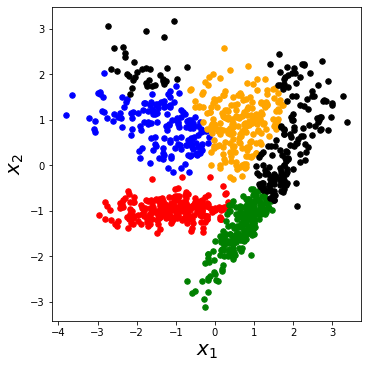

In [15]:
cores = ['red','blue','green','orange'] #Deve ser compatível com o número de classes

FS = (5,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#Subgráfico...
ax = fig.add_subplot(spec[0,0])
for i in range(0,c):
    pos = np.where( np.array(pred) == i)
    ax.scatter(data[pos, 0], data[pos, 1], marker='o', c=cores[i], s=30)
    
#Inclusão de agrupamentos não rotulados
pos = np.where( np.array(pred) == -1)
if len(pos) > 0: ax.scatter(data[pos, 0], data[pos, 1], marker='o', c='black', s=30)

ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)

plt.show()